<a href="https://colab.research.google.com/github/MyatCharm/MM-DataScience-practice/blob/main/myanmards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Data Cleaning

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/myanmards/resource_files/master/sample-clean.csv")
df

,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,weight,birth_place
0,1,02-09-53,Georgi,Facello,M,26-06-86,500000,165,64.0,NY
1,2,02-06-64,Bezalel,Simmel,F,21-11-85,120000,155,59.0,Chicago
2,3,03-12-59,Parto,Bamford,M,28-08-86,350000,158,75.0,Los Angeles
3,4,01-05-54,Chirstian,Koblick,M,01-12-86,400000,149,77.0,Los Angeles
4,5,21-01-55,Kyoichi,Maliniak,M,12-09-89,200000,169,74.0,LA
...,...,...,...,...,...,...,...,...,...,...
95,96,16-09-54,Jayson,Mandell,M,14-01-90,750000,173,58.0,LA
96,97,27-02-52,Remzi,Waschkowski,M,15-09-90,200000,171,NaN,Chicago
97,98,23-09-61,Sreekrishna,Servieres,F,13-05-85,400000,158,62.0,New York
98,99,25-05-56,Valter,Sullins,F,18-10-88,200000,159,73.0,Houston


In [ ]:
#check how many NaN value (formarly is only 78 in weight coulumn)
df.count()

emp_id         100
birth_date     100
first_name     100
last_name      100
gender         100
hire_date      100
salary         100
height         100
weight          78
birth_place    100
dtype: int64

In [ ]:
df.dropna(axis=1)

,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,birth_place
0,1,02-09-53,Georgi,Facello,M,26-06-86,500000,165,NY
1,2,02-06-64,Bezalel,Simmel,F,21-11-85,120000,155,Chicago
2,3,03-12-59,Parto,Bamford,M,28-08-86,350000,158,Los Angeles
3,4,01-05-54,Chirstian,Koblick,M,01-12-86,400000,149,Los Angeles
4,5,21-01-55,Kyoichi,Maliniak,M,12-09-89,200000,169,LA
...,...,...,...,...,...,...,...,...,...
95,96,16-09-54,Jayson,Mandell,M,14-01-90,750000,173,LA
96,97,27-02-52,Remzi,Waschkowski,M,15-09-90,200000,171,Chicago
97,98,23-09-61,Sreekrishna,Servieres,F,13-05-85,400000,158,New York
98,99,25-05-56,Valter,Sullins,F,18-10-88,200000,159,Houston


In [ ]:
#extract only rows with null value
df[df.isnull().any(axis=1)] 

,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,weight,birth_place
5,6,20-04-53,Anneke,Preusig,F,02-06-89,300000,162,NaN,Houston
9,10,01-06-63,Duangkaew,Piveteau,F,24-08-89,200000,161,NaN,Washington D.C.
15,16,02-05-61,Kazuhito,Cappelletti,M,27-01-95,150000,180,NaN,Chicago
21,22,08-07-52,Shahaf,Famili,M,22-08-95,150000,165,NaN,Houston
28,29,13-12-56,Otmar,Herbst,M,20-11-85,300000,160,NaN,Atlanta
31,32,09-08-60,Jeong,Reistad,F,20-06-90,200000,167,NaN,WDC
32,33,14-11-56,Arif,Merlo,M,18-03-87,400000,159,NaN,WDC
33,34,29-12-62,Bader,Swan,M,21-09-88,200000,160,NaN,Atlanta
43,44,21-09-61,Mingsen,Casley,F,21-05-94,200000,171,NaN,Austin
44,45,14-08-57,Moss,Shanbhogue,M,02-09-89,300000,149,NaN,Washington D.C.


In [ ]:
df['weight'].fillna(int(df['weight'].mean()), inplace=True)
df

,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,weight,birth_place
0,1,02-09-53,Georgi,Facello,M,26-06-86,500000,165,64.0,NY
1,2,02-06-64,Bezalel,Simmel,F,21-11-85,120000,155,59.0,Chicago
2,3,03-12-59,Parto,Bamford,M,28-08-86,350000,158,75.0,Los Angeles
3,4,01-05-54,Chirstian,Koblick,M,01-12-86,400000,149,77.0,Los Angeles
4,5,21-01-55,Kyoichi,Maliniak,M,12-09-89,200000,169,74.0,LA
...,...,...,...,...,...,...,...,...,...,...
95,96,16-09-54,Jayson,Mandell,M,14-01-90,750000,173,58.0,LA
96,97,27-02-52,Remzi,Waschkowski,M,15-09-90,200000,171,64.0,Chicago
97,98,23-09-61,Sreekrishna,Servieres,F,13-05-85,400000,158,62.0,New York
98,99,25-05-56,Valter,Sullins,F,18-10-88,200000,159,73.0,Houston


In [ ]:
#Check data format (standardization)
df.birth_place.value_counts()

Washington D.C.    15
Los Angeles        13
Atlanta            11
Houston            10
WDC                10
New York           10
Chicago             9
Dallas              7
LA                  6
NY                  5
Austin              4
Name: birth_place, dtype: int64

In [ ]:
df['birth_place'] = df['birth_place'].str.replace('NY','New York')
df['birth_place'] = df['birth_place'].str.replace('LA','Los Angeles')
df['birth_place'] = df['birth_place'].str.replace('WDC','Washington D.C.')

In [ ]:
df['weight(lb)'] = df['weight']*2.205
df

,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,weight,birth_place,weight(lb)
0,1,02-09-53,Georgi,Facello,M,26-06-86,500000,165,64.0,New York,141.120
1,2,02-06-64,Bezalel,Simmel,F,21-11-85,120000,155,59.0,Chicago,130.095
2,3,03-12-59,Parto,Bamford,M,28-08-86,350000,158,75.0,Los Angeles,165.375
3,4,01-05-54,Chirstian,Koblick,M,01-12-86,400000,149,77.0,Los Angeles,169.785
4,5,21-01-55,Kyoichi,Maliniak,M,12-09-89,200000,169,74.0,Los Angeles,163.170
...,...,...,...,...,...,...,...,...,...,...,...
95,96,16-09-54,Jayson,Mandell,M,14-01-90,750000,173,58.0,Los Angeles,127.890
96,97,27-02-52,Remzi,Waschkowski,M,15-09-90,200000,171,64.0,Chicago,141.120
97,98,23-09-61,Sreekrishna,Servieres,F,13-05-85,400000,158,62.0,New York,136.710
98,99,25-05-56,Valter,Sullins,F,18-10-88,200000,159,73.0,Houston,160.965


In [ ]:
#Normalization (simple)(old/max)
df['height'] = round(df['height']/df['height'].max(),2)
df

,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,weight,birth_place
0,1,02-09-53,Georgi,Facello,M,26-06-86,500000,0.85,0.46875,New York
1,2,02-06-64,Bezalel,Simmel,F,21-11-85,120000,0.79,0.31250,Chicago
2,3,03-12-59,Parto,Bamford,M,28-08-86,350000,0.81,0.81250,Los Angeles
3,4,01-05-54,Chirstian,Koblick,M,01-12-86,400000,0.76,0.87500,Los Angeles
4,5,21-01-55,Kyoichi,Maliniak,M,12-09-89,200000,0.87,0.78125,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
95,96,16-09-54,Jayson,Mandell,M,14-01-90,750000,0.89,0.28125,Los Angeles
96,97,27-02-52,Remzi,Waschkowski,M,15-09-90,200000,0.88,0.46875,Chicago
97,98,23-09-61,Sreekrishna,Servieres,F,13-05-85,400000,0.81,0.40625,New York
98,99,25-05-56,Valter,Sullins,F,18-10-88,200000,0.82,0.75000,Houston


In [ ]:
#Normalization (min-max)(old-min/max-min)
df['weight'] = round((df['weight']-df['weight'].min())/(df['weight'].max()-df['weight'].min()),2)
df

,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,weight,birth_place
0,1,02-09-53,Georgi,Facello,M,26-06-86,500000,0.85,0.47,New York
1,2,02-06-64,Bezalel,Simmel,F,21-11-85,120000,0.79,0.31,Chicago
2,3,03-12-59,Parto,Bamford,M,28-08-86,350000,0.81,0.81,Los Angeles
3,4,01-05-54,Chirstian,Koblick,M,01-12-86,400000,0.76,0.88,Los Angeles
4,5,21-01-55,Kyoichi,Maliniak,M,12-09-89,200000,0.87,0.78,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
95,96,16-09-54,Jayson,Mandell,M,14-01-90,750000,0.89,0.28,Los Angeles
96,97,27-02-52,Remzi,Waschkowski,M,15-09-90,200000,0.88,0.47,Chicago
97,98,23-09-61,Sreekrishna,Servieres,F,13-05-85,400000,0.81,0.41,New York
98,99,25-05-56,Valter,Sullins,F,18-10-88,200000,0.82,0.75,Houston


In [ ]:
#Normalization (z-score)(old-mean/std)
df['salary'] = round((df['salary']-df['salary'].mean())/(df['salary'].std()),2)
df


,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,weight,birth_place
0,1,02-09-53,Georgi,Facello,M,26-06-86,0.90,0.85,0.47,New York
1,2,02-06-64,Bezalel,Simmel,F,21-11-85,-1.06,0.79,0.31,Chicago
2,3,03-12-59,Parto,Bamford,M,28-08-86,0.13,0.81,0.81,Los Angeles
3,4,01-05-54,Chirstian,Koblick,M,01-12-86,0.39,0.76,0.88,Los Angeles
4,5,21-01-55,Kyoichi,Maliniak,M,12-09-89,-0.65,0.87,0.78,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
95,96,16-09-54,Jayson,Mandell,M,14-01-90,2.20,0.89,0.28,Los Angeles
96,97,27-02-52,Remzi,Waschkowski,M,15-09-90,-0.65,0.88,0.47,Chicago
97,98,23-09-61,Sreekrishna,Servieres,F,13-05-85,0.39,0.81,0.41,New York
98,99,25-05-56,Valter,Sullins,F,18-10-88,-0.65,0.82,0.75,Houston


In [ ]:
pd.get_dummies(df,columns = ['gender'])

,emp_id,birth_date,first_name,last_name,hire_date,salary,height,weight,birth_place,gender_F,gender_M
0,1,02-09-53,Georgi,Facello,26-06-86,0.90,0.85,0.47,New York,0,1
1,2,02-06-64,Bezalel,Simmel,21-11-85,-1.06,0.79,0.31,Chicago,1,0
2,3,03-12-59,Parto,Bamford,28-08-86,0.13,0.81,0.81,Los Angeles,0,1
3,4,01-05-54,Chirstian,Koblick,01-12-86,0.39,0.76,0.88,Los Angeles,0,1
4,5,21-01-55,Kyoichi,Maliniak,12-09-89,-0.65,0.87,0.78,Los Angeles,0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,96,16-09-54,Jayson,Mandell,14-01-90,2.20,0.89,0.28,Los Angeles,0,1
96,97,27-02-52,Remzi,Waschkowski,15-09-90,-0.65,0.88,0.47,Chicago,0,1
97,98,23-09-61,Sreekrishna,Servieres,13-05-85,0.39,0.81,0.41,New York,1,0
98,99,25-05-56,Valter,Sullins,18-10-88,-0.65,0.82,0.75,Houston,1,0


In [ ]:
#Binning
bins = np.linspace(min(df['salary']),max(df['salary']),6)
bin_names = ["very low","low","average","high","very high"]
df['salary_group']= pd.cut(df['salary'],bins, labels= bin_names, include_lowest = True)
df.head()

,emp_id,birth_date,first_name,last_name,gender,hire_date,salary,height,weight,birth_place,salary_group
0,1,02-09-53,Georgi,Facello,M,26-06-86,500000,165,64.0,NY,high
1,2,02-06-64,Bezalel,Simmel,F,21-11-85,120000,155,59.0,Chicago,very low
2,3,03-12-59,Parto,Bamford,M,28-08-86,350000,158,75.0,Los Angeles,low
3,4,01-05-54,Chirstian,Koblick,M,01-12-86,400000,149,77.0,Los Angeles,average
4,5,21-01-55,Kyoichi,Maliniak,M,12-09-89,200000,169,74.0,LA,very low


## Correalation Coefficient

In [ ]:
df_cor = pd.read_csv("https://raw.githubusercontent.com/myanmards/resource_files/master/correlation.csv")
df_cor


,Day_No,Temp,Cold_Drink,Hot_Drink,Snacks
0,1,35,120,175,45
1,2,35,122,170,50
2,3,36,125,172,51
3,4,36,130,170,52
4,5,35,128,177,45
...,...,...,...,...,...
115,116,39,145,111,45
116,117,38,142,121,52
117,118,35,120,152,48
118,119,34,122,159,46


In [ ]:
df_cor.describe()

,Day_No,Temp,Cold_Drink,Hot_Drink,Snacks
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,38.533333,141.750000,128.766667,50.066667
std,34.785054,2.315216,13.111833,19.615948,2.946963
min,1.000000,34.000000,115.000000,109.000000,45.000000
25%,30.750000,36.000000,130.000000,114.750000,48.000000
50%,60.500000,39.000000,145.000000,120.000000,51.000000
75%,90.250000,40.000000,151.000000,139.250000,52.000000
max,120.000000,42.000000,162.000000,177.000000,56.000000


In [ ]:
df_cor.corr(method='pearson',min_periods=1)

,Day_No,Temp,Cold_Drink,Hot_Drink,Snacks
Day_No,1.000000,0.269834,0.378274,-0.468887,0.045251
Temp,0.269834,1.000000,0.890255,-0.734043,-0.021266
Cold_Drink,0.378274,0.890255,1.000000,-0.756659,0.042191
Hot_Drink,-0.468887,-0.734043,-0.756659,1.000000,-0.100323
Snacks,0.045251,-0.021266,0.042191,-0.100323,1.000000


In [ ]:
df_cor.corr(method='kendall',min_periods=1)

,Day_No,Temp,Cold_Drink,Hot_Drink,Snacks
Day_No,1.000000,0.189172,0.275782,-0.341609,0.009087
Temp,0.189172,1.000000,0.736854,-0.551354,-0.033551
Cold_Drink,0.275782,0.736854,1.000000,-0.511530,0.025593
Hot_Drink,-0.341609,-0.551354,-0.511530,1.000000,-0.036256
Snacks,0.009087,-0.033551,0.025593,-0.036256,1.000000


In [ ]:
df_cor.corr(method='spearman',min_periods=1)

,Day_No,Temp,Cold_Drink,Hot_Drink,Snacks
Day_No,1.000000,0.264297,0.380530,-0.457385,0.009190
Temp,0.264297,1.000000,0.870657,-0.690304,-0.043479
Cold_Drink,0.380530,0.870657,1.000000,-0.686986,0.029932
Hot_Drink,-0.457385,-0.690304,-0.686986,1.000000,-0.045372
Snacks,0.009190,-0.043479,0.029932,-0.045372,1.000000


In [ ]:
df_cor[['Temp','Cold_Drink']].corr()

,Temp,Cold_Drink
Temp,1.000000,0.890255
Cold_Drink,0.890255,1.000000


In [ ]:
df_cor.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-11-92515a955fba>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_cor.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Day_No,Temp,Cold_Drink,Hot_Drink,Snacks
Day_No,1.00,0.27,0.38,-0.47,0.05
Temp,0.27,1.00,0.89,-0.73,-0.02
Cold_Drink,0.38,0.89,1.00,-0.76,0.04
Hot_Drink,-0.47,-0.73,-0.76,1.00,-0.10
Snacks,0.05,-0.02,0.04,-0.10,1.00


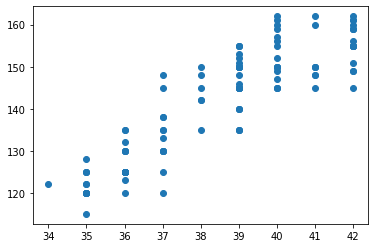

In [ ]:
plt.scatter(df_cor['Temp'], df_cor['Cold_Drink'])
plt.show()

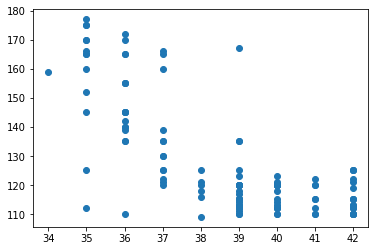

In [ ]:
plt.scatter(df_cor['Temp'], df_cor['Hot_Drink'])
plt.show()

## ANOVA

In [ ]:
df_anv = pd.read_csv("https://raw.githubusercontent.com/myanmards/resource_files/master/sample_anova.csv")
df_anv

,emp_id,first_name,last_name,gender,salary,work_exp
0,1,Georgi,Facello,M,500000,Mid
1,2,Bezalel,Simmel,F,120000,Junior
2,3,Parto,Bamford,M,350000,Junior
3,4,Chirstian,Koblick,M,400000,Mid
4,5,Kyoichi,Maliniak,M,200000,Junior
...,...,...,...,...,...,...
95,96,Jayson,Mandell,M,750000,Junior
96,97,Remzi,Waschkowski,M,200000,Junior
97,98,Sreekrishna,Servieres,F,400000,Mid
98,99,Valter,Sullins,F,200000,Junior


In [ ]:
df_anv = df_anv[['salary','work_exp']]
df_anv

,salary,work_exp
0,500000,Mid
1,120000,Junior
2,350000,Junior
3,400000,Mid
4,200000,Junior
...,...,...
95,750000,Junior
96,200000,Junior
97,400000,Mid
98,200000,Junior


In [ ]:
F,p = stats.f_oneway(df_anv[df_anv.work_exp == 'Junior'].salary,
                     df_anv[df_anv.work_exp == 'Mid'].salary,
                     df_anv[df_anv.work_exp == 'Senior'].salary)
F,p

(43.767065333017584, 2.84255584357536e-14)

In [ ]:
bins = np.linspace(min(df_anv['salary']),max(df_anv['salary']),4)
bin_names = ['Low','Medium','High']

In [ ]:
df_anv['New_Salary_group'] = pd.cut(df_anv['salary'],bins,labels=bin_names,include_lowest = True)
df_anv.head(10)

<ipython-input-7-3c8c1831cea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anv['New_Salary_group'] = pd.cut(df_anv['salary'],bins,labels=bin_names,include_lowest = True)


,salary,work_exp,New_Salary_group
0,500000,Mid,Medium
1,120000,Junior,Low
2,350000,Junior,Medium
3,400000,Mid,Medium
4,200000,Junior,Low
5,300000,Junior,Low
6,150000,Junior,Low
7,750000,Mid,High
8,750000,Senior,High
9,200000,Junior,Low


In [ ]:
F,p = stats.f_oneway(df_anv[df_anv.New_Salary_group == 'Low'].salary,
                     df_anv[df_anv.New_Salary_group == 'Medium'].salary,
                     df_anv[df_anv.New_Salary_group == 'High'].salary)
F,p

(579.7277387424342, 1.1214878408179476e-54)

## Simple Linear Regression

In [ ]:
slr = LinearRegression()
slr

LinearRegression()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/myanmards/resource_files/master/regression-one.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [ ]:
df[['Life expectancy','Alcohol','BMI','GDP','Income composition of resources','Schooling']].corr()

,Life expectancy,Alcohol,BMI,GDP,Income composition of resources,Schooling
Life expectancy,1.000000,0.404877,0.567694,0.461455,0.724776,0.751975
Alcohol,0.404877,1.000000,0.330408,0.354712,0.450040,0.547378
BMI,0.567694,0.330408,1.000000,0.301557,0.508774,0.546961
GDP,0.461455,0.354712,0.301557,1.000000,0.460341,0.448273
Income composition of resources,0.724776,0.450040,0.508774,0.460341,1.000000,0.800092
Schooling,0.751975,0.547378,0.546961,0.448273,0.800092,1.000000


In [ ]:
df[df.isnull().any(axis=1)]

,Country,Year,Status,life-expect,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,income-resources,Schooling


In [ ]:
df = df.dropna()
df.shape

(1649, 22)

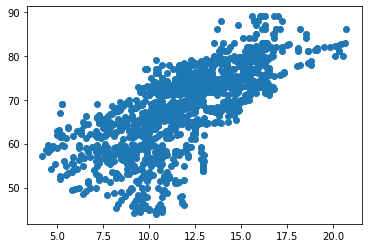

In [ ]:
plt.scatter(df['Schooling'],df['Life expectancy'],marker = 'o')
plt.show()

In [ ]:
X1 = df[['Schooling']]
y = df['Life expectancy']
X1.head()

,Schooling
0,10.1
1,10.0
2,9.9
3,9.8
4,9.5


In [ ]:
slr.fit(X1,y)

LinearRegression()

In [ ]:
SLRyhat = slr.predict(X1)
SLRyhat[0:50]

array([64.6771856 , 64.44820695, 64.2192283 , 63.99024965, 63.30331369,
       62.61637773, 61.92944178, 61.47148447, 60.78454852, 60.09761256,
       59.63965526, 57.12089008, 56.43395413, 55.74701817, 55.06008222,
       54.14416761, 74.06531034, 74.06531034, 74.06531034, 74.06531034,
       72.00450247, 70.17267325, 69.48573729, 69.02777999, 68.11186538,
       67.65390808, 66.28003617, 66.50901482, 66.05105751, 66.05105751,
       65.82207886, 66.05105751, 74.52326764, 74.52326764, 74.52326764,
       73.60735303, 72.69143842, 71.54654516, 70.4016519 , 69.71471595,
       69.71471595, 69.02777999, 68.34084403, 67.65390808, 67.65390808,
       65.13514291, 63.07433504, 62.15842043, 61.01352717, 60.09761256])

In [ ]:
df.insert(4,'predict-life-expect',SLRyhat, True)
df.head()

,Country,Year,Status,Life expectancy,predict-life-expect,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,64.677186,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64.448207,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,64.219228,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,63.990250,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,63.303314,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df['Schooling'].max()

20.7

In [ ]:
slr.coef_

array([2.28978652])

In [ ]:
slr.intercept_

41.5503417453634

In [ ]:
y = (2.28978652*5) + 41.5503417453634
y

52.999274345363396

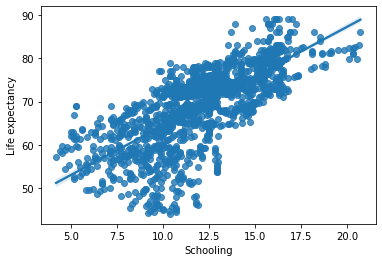

In [ ]:
sns.regplot(x=df['Schooling'],y=df['Life expectancy'])
plt.show() 

## Multiple Linear Regression

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/myanmards/resource_files/master/regression-one.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df = df.dropna()
df.shape

(1649, 22)

In [ ]:
X2 = df[['Alcohol','GDP','BMI','Schooling']]
y = df['Life expectancy']
mlr = LinearRegression()
mlr.fit(X2,y)
MLRyhat = mlr.predict(X2)

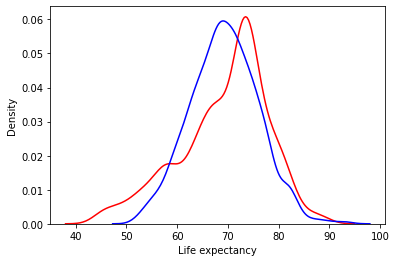

In [ ]:
axs = sns.kdeplot (df['Life expectancy'],color = 'r',label ='Actual Value')
sns.kdeplot(yml_hat,color = 'b',label = 'Predicted Value', ax= axs)
plt.show()

## Polynomial Regression

In [ ]:
X3 = df['Schooling']
y = df['Life expectancy']

In [ ]:
f = np.polyfit(X3,y,3)
model = np.poly1d(f)
print (model)

         3         2
-0.0254 x + 0.936 x - 8.596 x + 81.05


In [ ]:
PRyhat = model(X3)
PRyhat

array([63.54170723, 63.28970051, 63.04117145, ..., 63.28970051,
       62.79627248, 62.79627248])

In [ ]:
line = np.linspace (X3.min(),X3.max(),100)

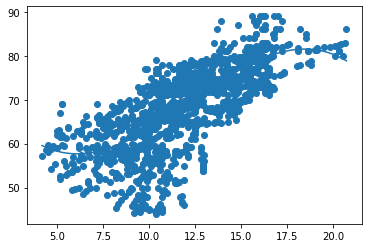

In [ ]:
plt.scatter(X3,y)
plt.plot(line,model(line))
plt.show()

In [ ]:
model(1325)

-57461548.600115605

## Evaluation

Lesser MSE and R2 score closer to 1 is more favourable

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
SLR_MSE = mean_squared_error(y,SLRyhat)
SLR_MSE

36.39144686879598

In [ ]:
SLR_R2 = slr.score(X1,y)
SLR_R2

0.5294454639356108

In [ ]:
MLR_MSE = mean_squared_error(y,MLRyhat)
MLR_MSE

32.66263978796142

In [ ]:
MLR_R2 = mlr.score(X2,y)
MLR_R2

0.5776602846411929

In [ ]:
PR_MSE = mean_squared_error(y,PRyhat)
PR_MSE

34.73390295312004

In [ ]:
PR_R2 = r2_score(y,PRyhat)
PR_R2

0.5508781047168168

## **Steps for selecting Good fit Model**



1.   Does **Predicted Values** make sense?
2.   Use **Visualization** of regression line
3.   Numerical Evaluation **(MSE, R-squared)**
4.   Compare models each other



## Logistic Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
dfl = pd.read_csv("https://raw.githubusercontent.com/myanmards/resource_files/master/job-fit.csv")
dfl

,age,education,experience,selected
0,24,1.0,2,0
1,35,3.5,8,1
2,23,1.0,1,0
3,35,3.0,7,1
4,45,1.0,10,0
5,32,2.0,8,1
6,31,1.5,7,1
7,45,4.0,15,1
8,22,2.0,2,0
9,33,1.5,5,0


In [6]:
X = dfl[['age','education','experience']]
y = dfl['selected']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

In [8]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)
y_predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

<Axes: xlabel='Predicted', ylabel='Actual'>

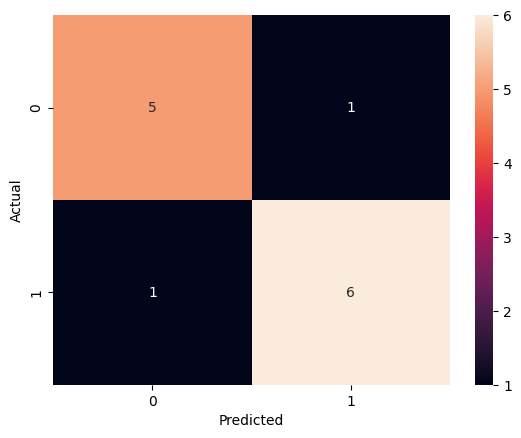

In [9]:
confusion_matrix = pd.crosstab(y_test,y_predict, rownames = ['Actual'],colnames = ['Predicted'])
sns.heatmap(confusion_matrix,annot = True)

In [11]:
print('Accurancy Score: ', metrics.accuracy_score(y_test,y_predict))

Accurancy Score:  0.8461538461538461


In [14]:
new_candidate = {'age':[25],'education':[3],'experience':[5]}
new_df = pd.DataFrame(new_candidate, columns = ['age','education','experience'])
new_df

,age,education,experience
0,25,3,5


In [15]:
y_new_predict = LR.predict(new_df)
print(y_new_predict)

[1]
